# Logistic Regression for multi-class problem

In [51]:
%matplotlib inline
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os,sys
sys.path.append(os.path.abspath('../../common')) #for import common.utility
from utility import plot_confusion_matrix,plot_decision_regions

## 載入Iris資料集


In [53]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [55]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
print(iris['data'].size)
print("target_names: "+str(iris['target_names']))
y = pd.DataFrame(iris['target'], columns=['target'])
iris_data = pd.concat([x,y], axis=1)
#iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
iris_data.head()

600
target_names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [57]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, iris_data['target'], test_size=0.3, random_state=0)

In [6]:
type(y_test)

pandas.core.series.Series

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler().fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [61]:
iris_data


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [64]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',multi_class='auto') # multi_class=multinomial
lr.fit(X_train,y_train)
print('training accuracy:',lr.score(X_train, y_train))
print('test accuracy:',lr.score(X_test, y_test))

training accuracy: 0.9809523809523809
test accuracy: 0.9777777777777777


In [65]:
X_test[:2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0


In [66]:
#prediction
pred=lr.predict(X_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


In [68]:
len(y_test.values)

45

In [44]:
X_test.iloc[[24,37],:]

,sepal length (cm),petal length (cm)
126,6.2,4.8
83,6.0,5.1


In [71]:
X_test.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [73]:
error_index=np.where(pred!=y_test.values)[0]
print('accuracy:',1-len(error_index)/len(X_test))
print('error_index:',error_index)
print('miss classification :',pred[error_index])
data_index=X_test.iloc[error_index].index
iris_data.iloc[data_index]

accuracy: 0.9777777777777777
error_index: [37]
miss classification : [2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
83,6.0,2.7,5.1,1.6,1


## decision_regions for test data

In [74]:
iris_data.iloc[data_index]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
83,6.0,2.7,5.1,1.6,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000254CD2CA820>,
      dtype=object)

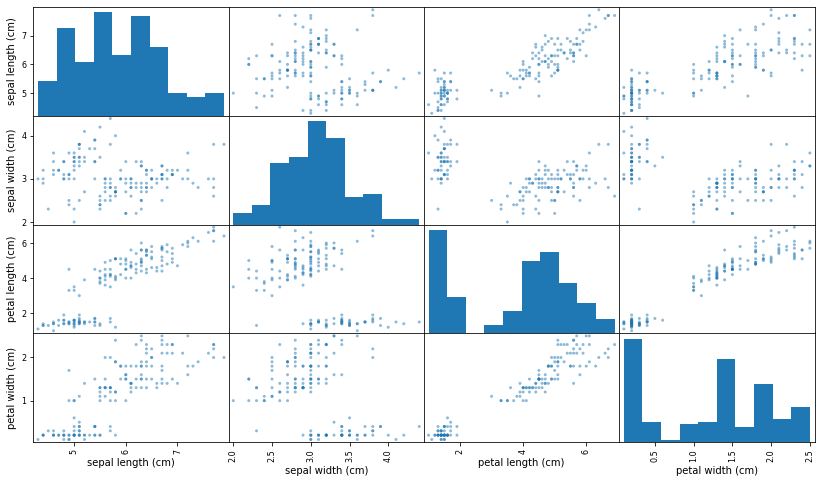

In [79]:
df = pd.DataFrame(x, columns=iris['feature_names'])
pd.plotting.scatter_matrix(df, figsize=(14,8), alpha=0.5)

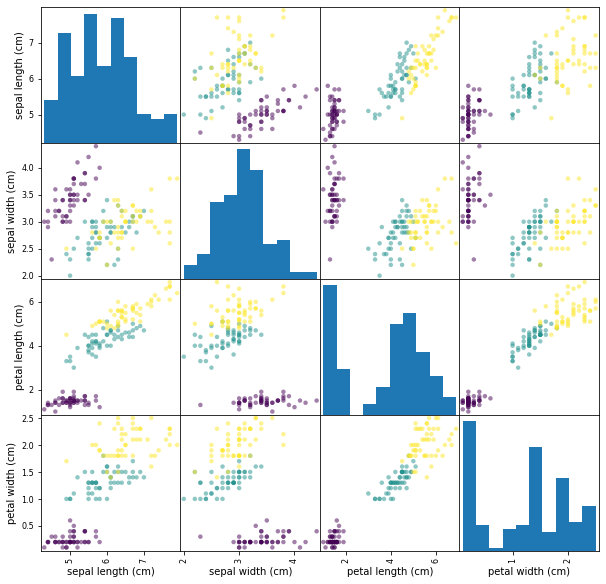

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)

pd.plotting.scatter_matrix(df, c=y, figsize = [10,10],
                      s=20, marker = 'A');
df['y'] = y

#sns.pairplot(df,hue='y')

## getting the confusion matrix

In [23]:
y_test.shape[0]

45

In [24]:
[i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==2]

[37]

In [25]:
[i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==1]

[24]

In [26]:
a=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==0 and pred[i]==0])
b=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==0 and pred[i]==1])
c=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==0 and pred[i]==2])
d=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==0])
e=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==1])
f=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==1 and pred[i]==2])
g=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==0])
h=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==1])
i=len([i for i in range(0,y_test.shape[0]) if y_test.values[i]==2 and pred[i]==2])
confusion_matrix=np.array([[a,b,c],[d,e,f],[g,h,i]])
print(confusion_matrix)

[[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


In [1]:
#0的有16個，1的有17個有1個被誤解為2，2的有10個被誤解為1的有1個
#準確率為1,17/18, 10/11